In [ ]:
import zipfile
import os

# === 1. Unzip the dataset ===
zip_path = '/content/flowers image dataset.zip'  # Use the correct path if different
extract_dir = 'flowers_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to: {extract_dir}")


Dataset extracted to: flowers_dataset


Found 2176 images belonging to 3 classes.
Found 544 images belonging to 3 classes.
Training using 2 CPU cores


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.4540 - loss: 0.9906 - val_accuracy: 0.4375 - val_loss: 0.9005
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4820 - loss: 0.8990 - val_accuracy: 0.5000 - val_loss: 0.8927
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4628 - loss: 0.9094 - val_accuracy: 0.5000 - val_loss: 0.8761
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5159 - loss: 0.9003 - val_accuracy: 0.4908 - val_loss: 0.8902
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5101 - loss: 0.8839 - val_accuracy: 0.5000 - val_loss: 0.8700
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.4717 - loss: 0.8935 - val_accuracy: 0.5000 - val_loss: 0.8763
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5026 - loss: 0.8998 - val_accuracy: 0.4688 - val_loss: 0.8773
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4944 - loss: 0.8921 - val_accuracy: 0.4706 - val_loss:

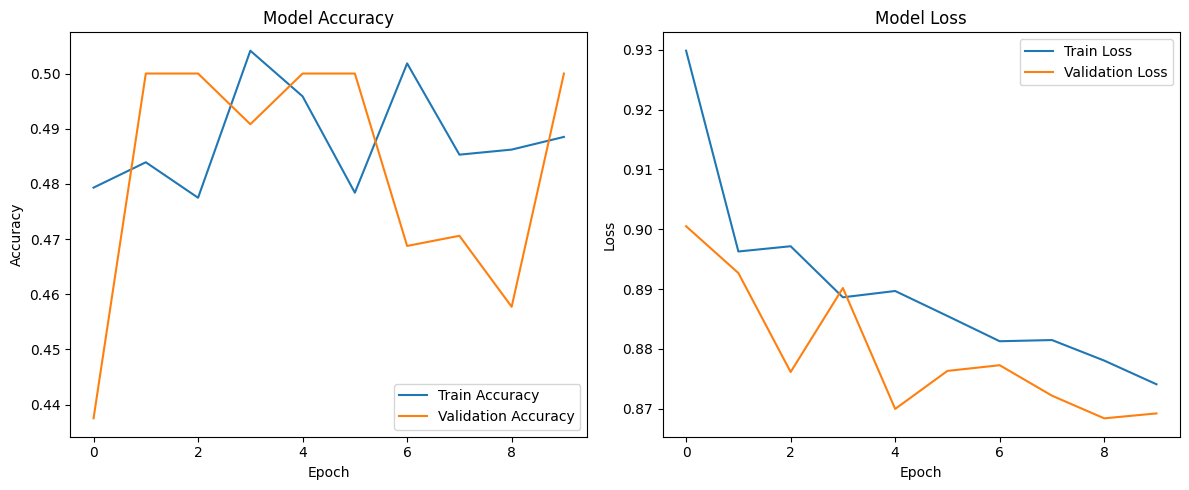

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step


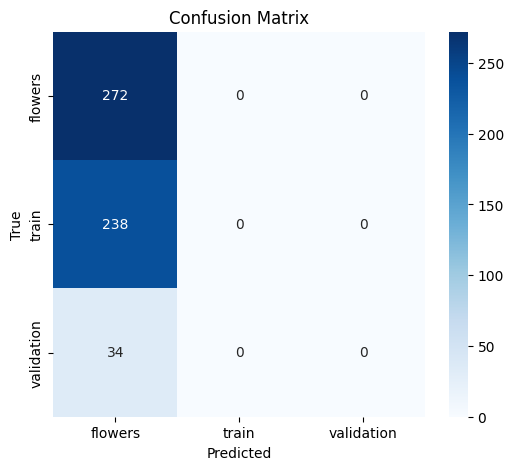


Classification Report:
              precision    recall  f1-score   support

     flowers       0.50      1.00      0.67       272
       train       0.00      0.00      0.00       238
  validation       0.00      0.00      0.00        34

    accuracy                           0.50       544
   macro avg       0.17      0.33      0.22       544
weighted avg       0.25      0.50      0.33       544



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
import zipfile
import os
import shutil
import multiprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: Extract ZIP
zip_path = "/content/flowers image dataset.zip"
extract_to = "/content/flowers_dataset"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_to)

# Step 2: Fix directory structure if nested
subdirs = os.listdir(extract_to)
if len(subdirs) == 1:
    nested_path = os.path.join(extract_to, subdirs[0])
    if os.path.isdir(nested_path):
        for item in os.listdir(nested_path):
            src_path = os.path.join(nested_path, item)
            dst_path = os.path.join(extract_to, item)
            shutil.move(src_path, dst_path)
        shutil.rmtree(nested_path)

# Step 3: Image data generator
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    extract_to,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    extract_to,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Step 4: Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train model
cpu_cores = multiprocessing.cpu_count()
print(f"Training using {cpu_cores} CPU cores")
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Step 6: Plot accuracy and loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Evaluate model
val_generator.reset()
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Step 8: Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)
idx_to_label = {v: k for k, v in train_generator.class_indices.items()}
labels_ordered = [idx_to_label[i] for i in range(len(idx_to_label))]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_ordered,
            yticklabels=labels_ordered)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=labels_ordered))

In [ ]:
# 1. Check class labels
print("Class indices:", val_generator.class_indices)
print("Number of classes:", len(val_generator.class_indices))

# 2. Check true labels
true_labels = val_generator.classes
print("Unique true labels:", np.unique(true_labels))
print("True label counts:", np.bincount(true_labels))

# 3. Check model summary
model.summary()

# 4. Predict
val_generator.shuffle = False
predictions = model.predict(val_generator, steps=len(val_generator), verbose=1)
print("Predictions shape:", predictions.shape)

# 5. Check predicted labels
predicted_labels = np.argmax(predictions, axis=1)
print("Unique predicted labels:", np.unique(predicted_labels))
print("Predicted label counts:", np.bincount(predicted_labels))



Class indices: {'flowers': 0}
Number of classes: 1
Unique true labels: [0]
True label counts: [272]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,430,849 (85.57 MB)

 Trainable params: 22,430,849 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 499ms/step
Predictions shape: (272, 1)
Unique predicted labels: [0]
Predicted label counts: [272]
